# Classificação de Diabetes

## Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Para que os gráficos fiquem na mesma página
%matplotlib inline

## Carregar e revisar dados
Os dados que serão utilizados foram baixados do dataset UCI (https://archive.ics.uci.edu/ml/datasets.html)
Para este estudo foi utilizado o dataset de diabetes do PIMA

Use o Tab para auto-complete

In [3]:
df = pd.read_csv("./data/pima-data.csv")

Quantidade de linhas e colunas

In [4]:
df.shape

(768, 10)

Amostras de dados (5 primeiros)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


Amostra de dados (5 últimos)

In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


| Feature | Descrição | Comentários |
|---------|-----------|------------|
| num_preg | Número de gravidezes |
| glucose_conc | Concentração de plasma de glicose de 2 horas a partir do teste oral de tolerância a glicose |
| diastolic_bp | Pressão sanguínia diastólica (mm Hg) |
| thickness | Espessura da pele do triceps (mm) |
| insulin | Soro de insulina de 2 horas (mu U/ml) |
| bmi | Índice de massa corporal (peso in Kg / (altura em m)ˆ2) |
| diab_pred | Função de predisposição de diabetes (pedigree) |
| age | Idade em anos |
| skin | ? | Não encontrado |
| diabetes | Variável de classe (1 = Verdadeiro, 0 = Falso) |



## Verificar valores nulos

In [7]:
df.isnull().values.any()

False

### Função de análise de correlação 

Ajuda a eliminar variáveis com mesma correlação

Azul Claro: sem correlação
Vemelho Escuro: muita correlação

Como as cores nos ambientes de desenvolvimento podem variar, levar como referência a diagnonal para efeito de alta correlação.

In [8]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

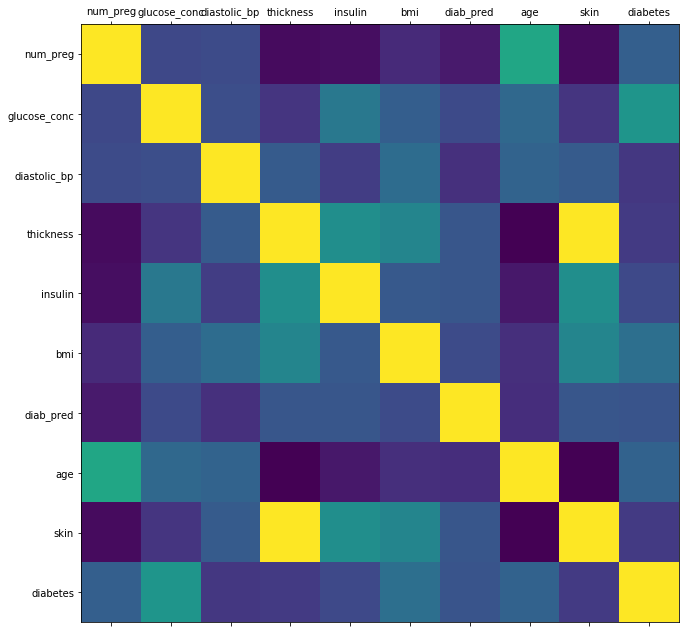

In [9]:
plot_corr(df)

As variáveis correlacionam com si próprias, por isso a diagnal destacadas. Outras variáveis com esta mesma coloração indicam correlação.

Por exemplo: skin com thickness

Visão numérica de correlação

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


Como os features skin e thickness caminham juntos, na mesma proporção, não trazem informação adicional, portanto devemos remover um destes features.

Vamos remover a feature skin

In [11]:
del df['skin']

In [12]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Revisar se não há mais nenhuma variável com correlação

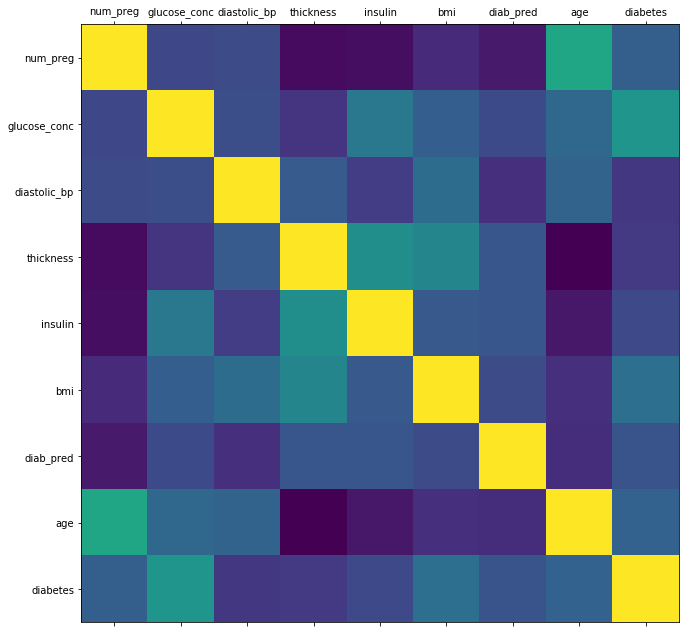

In [13]:
plot_corr(df)

## Ajustando tipos de dados

Alterando True/Fase para 0/1

In [14]:
diabetes_map = {True: 1, False: 0}

In [15]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Eventos raros

Verificar se há boa quantidade de itens nas duas classes (True/False) para identificar se há ocorrência de evento raro, que necessita de aboradagens específicas.

In [17]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


Boa distribuição de valores, sem necessidade de abordagem para eventos raros.

## Separando os dados

70% para treinamento e 30% para validação

In [18]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
#random_state: número aleatório para garantir divisões diferentes a cada execução

In [19]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


### Verificar se a distribuição dos dados foram preservadas

In [20]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 100 * (len(df.loc[df['diabetes'] == 1]) / len(df))))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 100 * (len(df.loc[df['diabetes'] == 0]) / len(df))))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 100 * (len(y_train[y_train[:] == 1]) / len(y_train))))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 100 * (len(y_train[y_train[:] == 0]) / len(y_train))))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 100 * (len(y_test[y_test[:] == 1]) / len(y_test))))
print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 100 * (len(y_test[y_test[:] == 0]) / len(y_test))))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


Distribuição se mantém bom, não se alterando muito da base original.

## Preparação de dados

Valores ausentes (iguais a zero)

In [21]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Valores zerados de thickness, insulin, num_preg são possíveis? Neste caso uma pessoa com domínio do problema pode ajudar.

Valores ausentes no geral

In [22]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


### Imputando valores

Imputando valores médios

In [23]:
from sklearn.preprocessing import Imputer

fill_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Criando classificador

### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

#### Acurácia dos dados de treinamento

In [25]:
from sklearn import metrics

nb_predict_train = nb_model.predict(X_train)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Acurácia: 0.7542


#### Acurácia dos dados de teste

In [26]:
nb_predict_test = nb_model.predict(X_test)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Acurácia: 0.7359


#### Métricas de avaliação

Acurácia > 70% parece bom, mas vamos checar outras métricas

In [27]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



Verdadeiro Negativo (FN) = 118

Falso Negativo (FN) = 28

Falso Positivo (FP) = 33

Verdadeiro Positivo (TP) = 52

Classificador perfeito: Verdadeiro Negativo = 151 e Verdadeiro Positivo = 80

Recall se refere a Sensibilidade.

Recall = TP / (TP + FN)

Precision = TP / (TP + FP)

Recall e Precisam precisam ter valores maiores que 70%.

Vamos tentar outros algoritmos para melhorar o Recall e Precision

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

#### Acurácia dos dados de treinamento

In [29]:
rf_predict_train = rf_model.predict(X_train)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Acurácia: 0.9870


#### Acurácia dos dados de teste

In [30]:
rf_predict_test = rf_model.predict(X_test)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Acurácia: 0.7100


#### Métricas de avaliação

In [31]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[121  30]
 [ 37  43]]

Classification Report
             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



Precison e Recall < 70% e muito baixos, houve o overfitting do modelo

### Logistic Regression

Incluindo parâmetro de regularização c = 0,7

In [32]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = 0.7, random_state = 42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

#### Acurácia dos dados de treinamento

In [33]:
lr_predict_train = lr_model.predict(X_train)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))

Acurácia: 0.7728


#### Acurácia dos dados de teste

In [34]:
lr_predict_test = lr_model.predict(X_test)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

Acurácia: 0.7446


In [35]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion Matrix
[[128  23]
 [ 36  44]]

Classification Report
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



Recall ainda baixo, é preciso ajustar o hiperparâmetro de regularização.

#### Regularização do hiperparâmetro

1st max value of 0.613 occured at C = 1.310


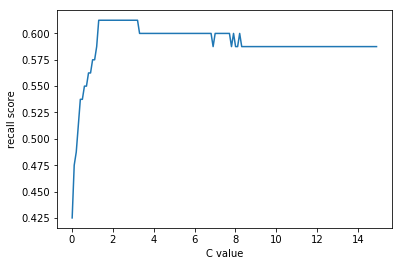

In [36]:
C_start = 0.01
C_end = 15
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while C_val < C_end:
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, random_state = 42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C = {1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Ainda estamos com 61,3% de recall mesmo ajustando os hiperparâmetros
Talvez o desbalanceamento dos dados podem estar interferindo nesta performance

### Logist Regression Balanced

Incluindo parâmetro class_weight="balanced"

#### Regularização do hiperparâmetro

1st max value of 0.738 occured at C = 0.301


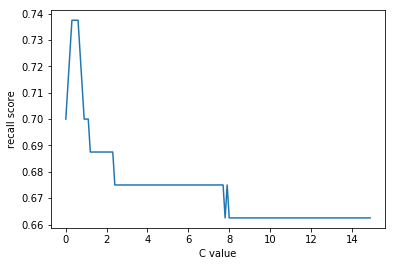

In [37]:
C_start = 0.001
C_end = 15
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while C_val < C_end:
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight = "balanced", random_state = 42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C = {1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Incluindo parâmetro de regularização c = 0,301

In [38]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = 0.301, class_weight = "balanced", random_state = 42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

#### Acurácia dos dados de treinamento

In [39]:
lr_predict_train = lr_model.predict(X_train)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))

Acurácia: 0.7449


#### Acurácia dos dados de teste

In [40]:
lr_predict_test = lr_model.predict(X_test)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

Acurácia: 0.7143


In [41]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion Matrix
[[106  45]
 [ 21  59]]

Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231



### Logistic Regression com Cross Validation

In [42]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, Cs = 3, cv = 10, refit = False, class_weight = "balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

#### Acurácia dos dados de treinamento

In [43]:
lr_cv_predict_train = lr_cv_model.predict(X_train)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))

Acurácia: 0.7672


#### Acurácia dos dados de teste

In [44]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

Acurácia: 0.7013


In [45]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Confusion Matrix
[[108  43]
 [ 26  54]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.72      0.76       151
          1       0.56      0.68      0.61        80

avg / total       0.72      0.70      0.71       231



In [46]:
unique_test = [[   6.   ,  148.   ,   72.   ,   35.   ,    0.   ,   33.6  ,
           0.627,   50.   ]]
lr_cv_model.predict(unique_test)

array([1])

### Support Vector Machines

#### Linear

In [47]:
from sklearn import svm
svm_linear_model = svm.SVC(kernel='linear')
svm_linear_model.fit(X_train, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Acurácia dos dados de treinamento

In [48]:
svm_linear_predict_train = svm_linear_model.predict(X_train)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_train, svm_linear_predict_train)))

Acurácia: 0.7840


#### Acurácia dos dados de teste

In [49]:
svm_linear_predict_test = svm_linear_model.predict(X_test)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_test, svm_linear_predict_test)))

Acurácia: 0.7359


In [50]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, svm_linear_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, svm_linear_predict_test))

Confusion Matrix
[[124  27]
 [ 34  46]]

Classification Report
             precision    recall  f1-score   support

          0       0.78      0.82      0.80       151
          1       0.63      0.57      0.60        80

avg / total       0.73      0.74      0.73       231



#### Polynomial

In [ ]:
from sklearn import svm
svm_poly_model = svm.SVC(kernel='poly', degree = 3)
svm_poly_model.fit(X_train, y_train.ravel())

#### Acurácia dos dados de treinamento

In [ ]:
svm_polypredict_train = svm_poly_model.predict(X_train)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_train, svm_poly_predict_train)))

#### Acurácia dos dados de teste

In [ ]:
svm_poly_predict_test = svm_poly_model.predict(X_test)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_test, svm_poly_predict_test)))

In [ ]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, svm_poly_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, svm_poly_predict_test))